In [1]:
import pandas as pd
import numpy as np

In [2]:
from helper_classes.DatabaseHelper import get_evaluation_score

In [3]:
user_scores = get_evaluation_score('d2v')

In [4]:
df_user_scores = pd.DataFrame(user_scores, columns=['user_id', 'avg_precision', 'avg_recall', 'avg_mrr'])
df_user_scores['user_id'] = df_user_scores['user_id'].astype(int)
df_user_scores['avg_precision'] = df_user_scores['avg_precision'].astype(float)
df_user_scores['avg_recall'] = df_user_scores['avg_recall'].astype(float)
df_user_scores['avg_mrr'] = df_user_scores['avg_mrr'].astype(float)

df_user_scores['avg_precision'] = df_user_scores['avg_precision'].astype(float) / 100
df_user_scores['avg_recall'] = df_user_scores['avg_recall'].astype(float) / 100
df_user_scores['avg_mrr'] = df_user_scores['avg_mrr'].astype(float) / 100
df_user_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr
0,3400270,0.389189,0.598649,0.675676
1,3379588,0.314286,0.828571,0.541667
2,3367370,0.242857,0.714966,0.785714
3,3395510,0.240000,0.933333,0.500000
4,3347716,0.225000,0.937500,0.645833


In [5]:
distinct_user_count = len(df_user_scores)
print('Number of the unique user count: ', distinct_user_count)

Number of the unique user count:  3605


Get the number of 'hits'

In [6]:
hit_counter = np.count_nonzero(df_user_scores['avg_precision'])
not_hit_counter = distinct_user_count - hit_counter
print(hit_counter)

768


In [7]:
import seaborn as sns

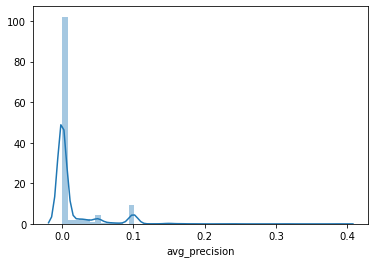

In [8]:
sns.distplot(df_user_scores['avg_precision'])

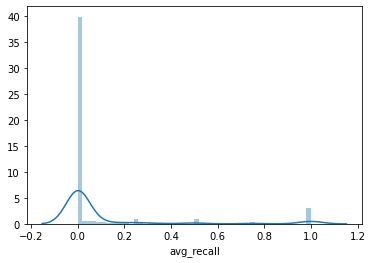

In [9]:
sns.distplot(df_user_scores['avg_recall'])

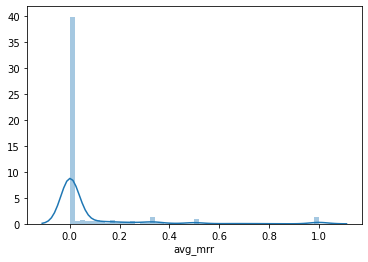

In [10]:
sns.distplot(df_user_scores['avg_mrr'])

In [11]:
def test(row):
    if (row.avg_precision > 0) and (row.avg_recall > 0) and (row.avg_mrr > 0):
        return 1
    else:
        return 0

In [12]:
df_user_scores['hit'] = df_user_scores.apply(test, axis=1)

In [13]:
df_user_scores.head()

,user_id,avg_precision,avg_recall,avg_mrr,hit
0,3400270,0.389189,0.598649,0.675676,1
1,3379588,0.314286,0.828571,0.541667,1
2,3367370,0.242857,0.714966,0.785714,1
3,3395510,0.240000,0.933333,0.500000,1
4,3347716,0.225000,0.937500,0.645833,1


In [14]:
number_of_hits = len(df_user_scores[df_user_scores['hit'] == 1])
print('Number of hits: ', number_of_hits)

Number of hits:  768


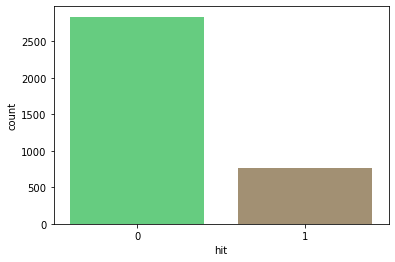

In [15]:
sns.countplot(x='hit',data=df_user_scores, palette='terrain')

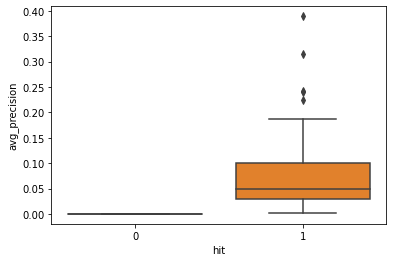

In [16]:
sns.boxplot(x='hit', y='avg_precision', data=df_user_scores)

In [17]:
df_user_scores.drop(columns=['user_id'], inplace=True)
df_user_scores.drop(columns=['hit'], inplace=True)

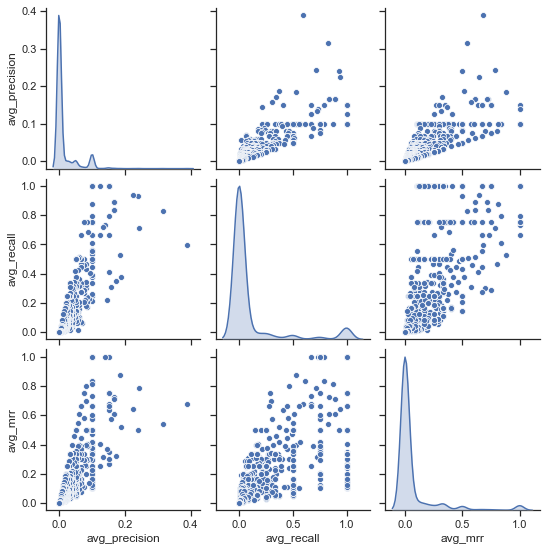

In [18]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(df_user_scores, diag_kind="kde")